## Demostración de seguridad usando Raiz primitiva en Problema del Logaritmo Discreto

El **logaritmo discreto** consiste en encontrar el entero \( x \) que satisface:

$$
\
g^x \equiv y \pmod{p}
\
$$

donde:

- \( p \) es un número primo.
- \( g \) es una raíz primitiva de \( p \)
- \( y \) es un entero tal que $ ( y = g^x \mod p ) $.

Existen diferentes métodos para resolver este problema:
1. **Búsqueda Exhaustiva (Brute Force):**  
   Se prueban todos los valores \( x = 0, 1, 2,... p-1 \). Su complejidad es \( O(p) \) y resulta ineficiente para valores grandes.
2. **Baby-step Giant-step (BSGS):**  
   Este algoritmo reduce la complejidad a \( O($\sqrt{p}$) \) dividiendo el problema en dos fases (baby-steps y giant-steps).

## Caso real
La empresa CBA está usando siempre el mismo número $ \alpha $ para realizar todas sus claves de firma en el algoritmo DSA.
Aunque lleva muchos años usando siempre el mismo número. la última auditoria externa realizada en la empresa le han penalizado por usar Firmas Digitales poco seguras en el entorno actual.

### Objetivo
Como criptoanalista debes mostrar en la reunión de dirección porque es será muy positivo implementar un nuevo flujo de trabajo que haga las claves de firma con un $ \alpha $ que sea raiz primitiva con el módulo elegido.

¿Cual sería esa grafica que mostrarias y tu parte explicativa?


In [3]:
import math
import time
import random
import matplotlib.pyplot as plt
import sympy  # obtener raíces primitivas
import libnum  # para trabajar con números grandes

In [4]:
def discrete_log_brute_force(g, y, p):
    for x in range(p):
        if pow(g, x, p) == y:
            return x
    return None

# Baby-step Giant-step (BSGS)
def discrete_log_bsgs(g, y, p):
    m = math.isqrt(p - 1) + 1  # m = ceil(sqrt(p-1))
    # Baby-steps: precomputamos g^j for j = 0, 1, ..., m-1
    baby_steps = {}
    for j in range(m):
        baby_steps[pow(g, j, p)] = j

    # Calcular g^(-m) mod p
    c = pow(g, m, p)
    c_inv = pow(c, -1, p)  # O bien usando sympy.mod_inverse(c, p)

    gamma = y
    for i in range(m):
        if gamma in baby_steps:
            return i * m + baby_steps[gamma]
        gamma = (gamma * c_inv) % p
    return None


In [8]:
# Lista de tamaños en bits para p
bit_sizes = [20, 23, 25]  # Se pueden agregar tamaños mayores (con precaución)
times_bruteforce = [] # tiempos de ejecución para brute force
times_bsgs = []     # tiempos de ejecución para BSGS

# Para cada tamaño en bits, se genera un primo, se obtiene una raíz primitiva,
# se elige un exponente secreto x, se calcula y y se mide el tiempo para hallar x
for bits in bit_sizes:
    p = libnum.generate_prime(bits) # primo de 'bits' bits
    g = sympy.primitive_root(p) # raíz primitiva
    
    x_true = random.randint(1, p-1) # exponente secreto
    y_val = pow(g, x_true, p) # y = g^x mod p
    
    # Medir tiempo para brute force
    start_time = time.perf_counter()
    x_bf = discrete_log_brute_force(g, y_val, p) 
    end_time = time.perf_counter()
    t_bf = end_time - start_time
    times_bruteforce.append(t_bf)
    
    # Medir tiempo para BSGS
    start_time = time.perf_counter()
    x_bsgs = discrete_log_bsgs(g, y_val, p)
    end_time = time.perf_counter()
    t_bsgs = end_time - start_time
    times_bsgs.append(t_bsgs)
    
    print(f"Bits: {bits}, p: {p}, g: {g}, x_true: {x_true}, x_bf: {x_bf}, x_bsgs: {x_bsgs}")
    print(f"Tiempo Brute Force: {t_bf:.6f} s, Tiempo BSGS: {t_bsgs:.6f} s\n")

Bits: 20, p: 890129, g: 3, x_true: 849298, x_bf: 849298, x_bsgs: 849298
Tiempo Brute Force: 0.526246 s, Tiempo BSGS: 0.000416 s

Bits: 23, p: 7034173, g: 2, x_true: 1128476, x_bf: 1128476, x_bsgs: 1128476
Tiempo Brute Force: 0.915493 s, Tiempo BSGS: 0.001369 s

Bits: 25, p: 19044341, g: 2, x_true: 18764309, x_bf: 18764309, x_bsgs: 18764309
Tiempo Brute Force: 11.983597 s, Tiempo BSGS: 0.001697 s



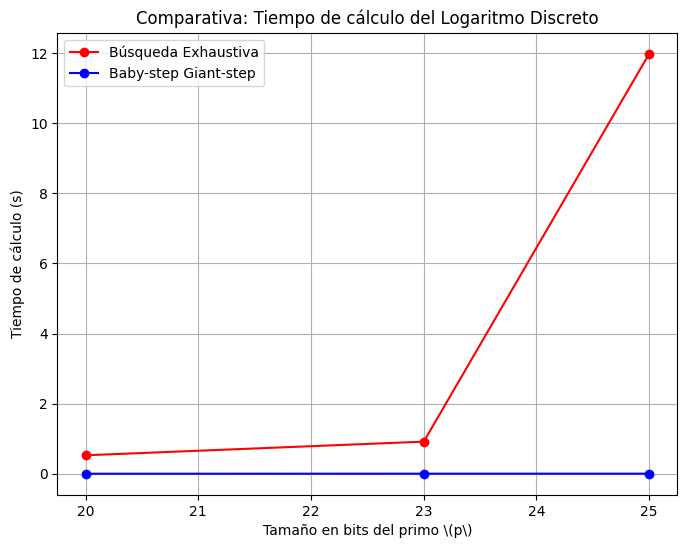

In [9]:
# Graficar la comparativa
plt.figure(figsize=(8,6))
plt.plot(bit_sizes, times_bruteforce, marker='o', linestyle='-', color='red', label='Búsqueda Exhaustiva')
plt.plot(bit_sizes, times_bsgs, marker='o', linestyle='-', color='blue', label='Baby-step Giant-step')
plt.xlabel("Tamaño en bits del primo \(p\)")
plt.ylabel("Tiempo de cálculo (s)")
plt.title("Comparativa: Tiempo de cálculo del Logaritmo Discreto")
plt.grid(True)
plt.legend()
plt.show()

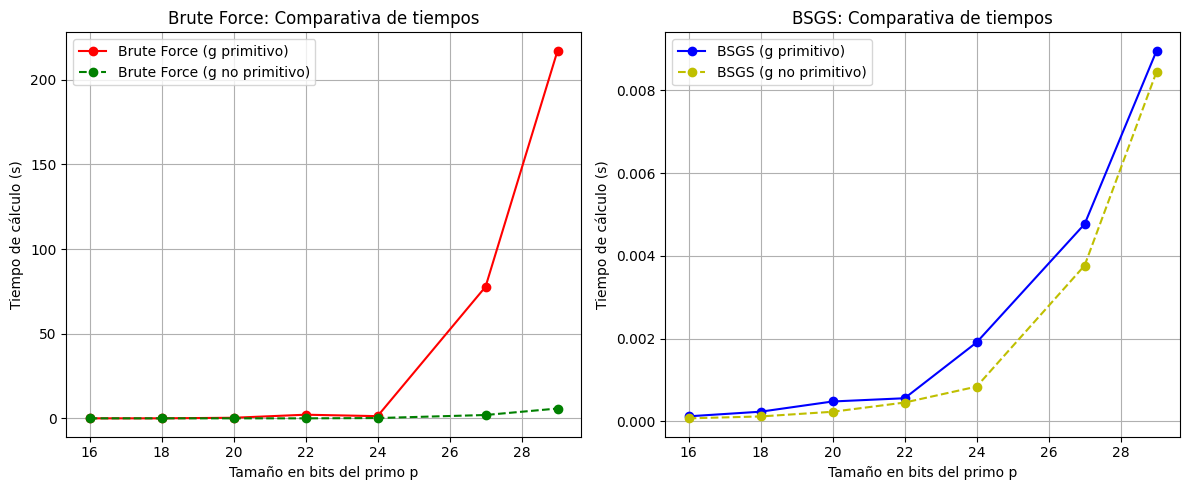

In [16]:
import math
import time
import random
import matplotlib.pyplot as plt
import sympy  # Para obtener raíces primitivas
import libnum  # Para trabajar con números grandes

def discrete_log_brute_force(g, y, p):
    for x in range(p):
        if pow(g, x, p) == y:
            return x
    return None

def discrete_log_bsgs(g, y, p):
    m = math.isqrt(p - 1) + 1
    baby_steps = {}
    for j in range(m):
        baby_steps[pow(g, j, p)] = j
    c = pow(g, m, p)
    c_inv = pow(c, -1, p)
    gamma = y
    for i in range(m):
        if gamma in baby_steps:
            return i * m + baby_steps[gamma]
        gamma = (gamma * c_inv) % p
    return None

def generar_g_no_primitivo(p):
    for g in range(2, p):
        if not sympy.is_primitive_root(g, p):
            return g
    return None

bit_sizes = [16,18,20, 22, 24, 27,29]
times_bruteforce_primitivo = []
times_bsgs_primitivo = []
times_bruteforce_no_primitivo = []
times_bsgs_no_primitivo = []

for bits in bit_sizes:
    p = libnum.generate_prime(bits)
    g_primitivo = sympy.primitive_root(p)
    g_no_primitivo = generar_g_no_primitivo(p)
    x_true = random.randint(1, p - 1)

    y_val_primitivo = pow(g_primitivo, x_true, p)
    start_time = time.perf_counter()
    discrete_log_brute_force(g_primitivo, y_val_primitivo, p)
    times_bruteforce_primitivo.append(time.perf_counter() - start_time)

    start_time = time.perf_counter()
    discrete_log_bsgs(g_primitivo, y_val_primitivo, p)
    times_bsgs_primitivo.append(time.perf_counter() - start_time)

    y_val_no_primitivo = pow(g_no_primitivo, x_true, p)
    start_time = time.perf_counter()
    discrete_log_brute_force(g_no_primitivo, y_val_no_primitivo, p)
    times_bruteforce_no_primitivo.append(time.perf_counter() - start_time)

    start_time = time.perf_counter()
    discrete_log_bsgs(g_no_primitivo, y_val_no_primitivo, p)
    times_bsgs_no_primitivo.append(time.perf_counter() - start_time)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(bit_sizes, times_bruteforce_primitivo, 'ro-', label='Brute Force (g primitivo)')
plt.plot(bit_sizes, times_bruteforce_no_primitivo, 'go--', label='Brute Force (g no primitivo)')
plt.xlabel("Tamaño en bits del primo p")
plt.ylabel("Tiempo de cálculo (s)")
plt.title("Brute Force: Comparativa de tiempos")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(bit_sizes, times_bsgs_primitivo, 'bo-', label='BSGS (g primitivo)')
plt.plot(bit_sizes, times_bsgs_no_primitivo, 'yo--', label='BSGS (g no primitivo)')
plt.xlabel("Tamaño en bits del primo p")
plt.ylabel("Tiempo de cálculo (s)")
plt.title("BSGS: Comparativa de tiempos")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
